In [61]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [62]:
#loading data
data = pd.read_csv("../Downloads/weatherAUS.csv")
df=data.copy()

In [63]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [64]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [66]:
#finding null values in data
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [67]:
#date is object, thus changing it to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [68]:
#checking the date view
data['Date'] 

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [69]:
#adding different columns for day, month and year
data['year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [70]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [71]:
#dropping the date column 
data.drop('Date',axis=1,inplace=True)

In [72]:
#listing the column
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

# DATA VISUALIZATION AND CLEANING

<Axes: xlabel='RainTomorrow', ylabel='count'>

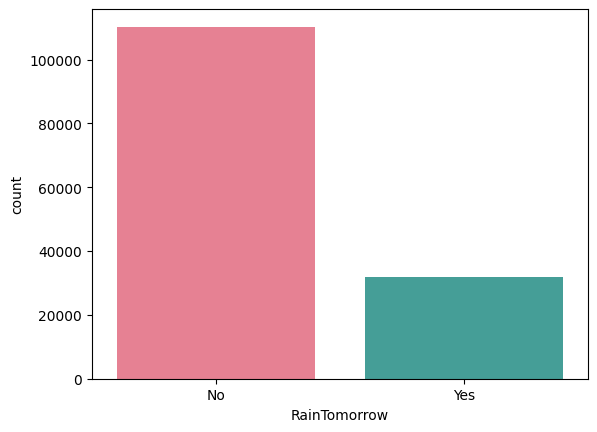

In [73]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= 'husl')

#### The data is imbalanced becuase there are more number of days when it didnt rain

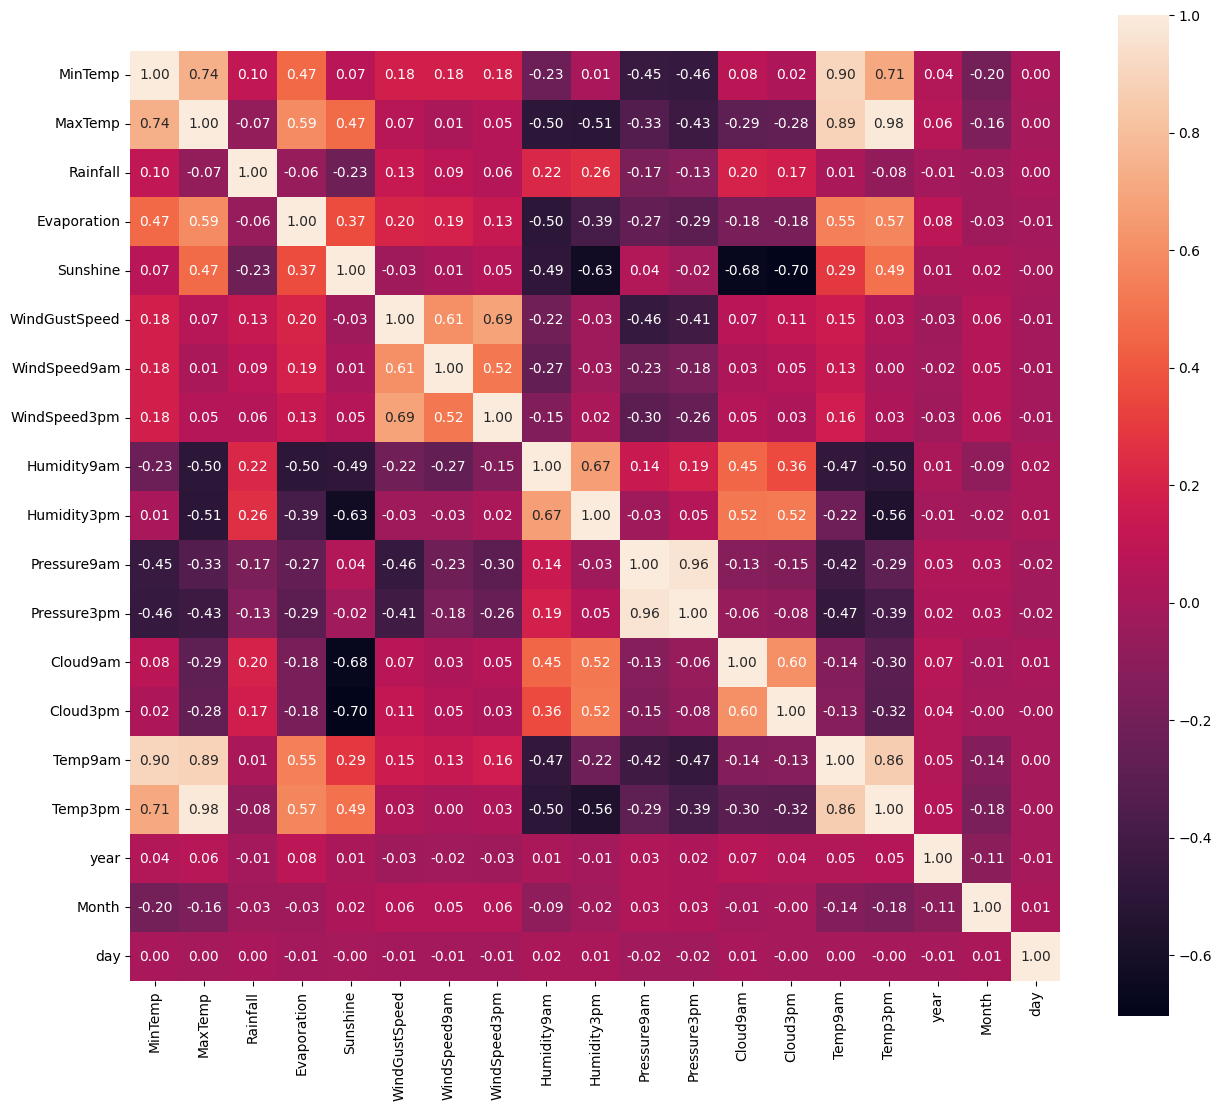

In [74]:
plt.figure(figsize=(15,13))
ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

## Rain today ~ Rain tomorrow



<Axes: xlabel='RainToday', ylabel='count'>

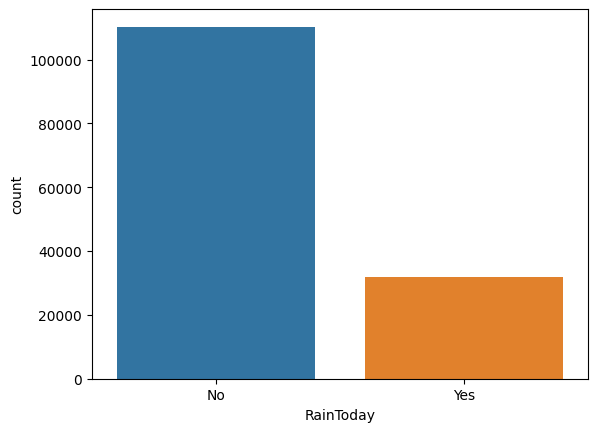

In [75]:
sns.countplot(x= data['RainToday'])

In [76]:
x=pd.crosstab(data['RainTomorrow'],data['RainToday'])
x

RainToday,No,Yes
RainTomorrow,,
No,92728,16858
Yes,16604,14597


In [77]:
y=x/x.transpose().sum().values.reshape(2,1)*100
y

RainToday,No,Yes
RainTomorrow,,
No,84.616648,15.383352
Yes,53.216243,46.783757


#### If it's not raining today then the chance of raining tomorrow = 15% 
#### while if it's raining today the chance of raining tomorrow = 46%


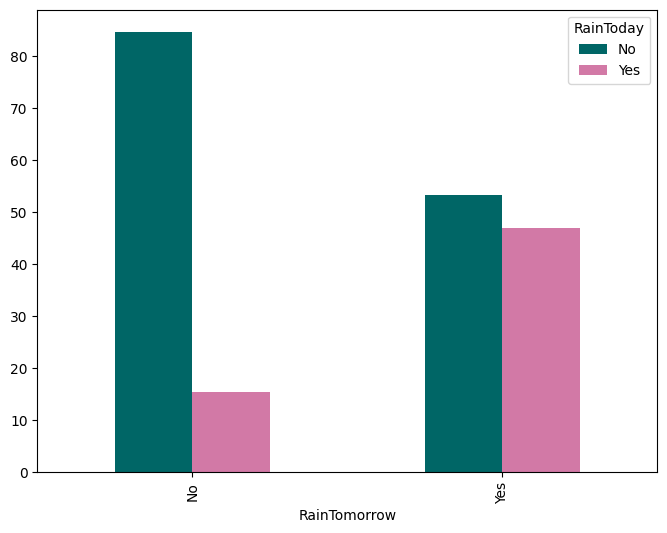

In [78]:
y.plot(kind="bar",figsize=(8,6),color=['#006666','#d279a6']);

## Location ~ Rain today

In [79]:
x=pd.crosstab(data['Location'],data['RainToday']) 
x

RainToday,No,Yes
Location,,
Adelaide,2402,689
Albany,2114,902
Albury,2394,617
AliceSprings,2788,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [80]:
# getting percentage of raining days and non raining days for each city 
y=x/x.transpose().sum().values.reshape((-1, 1))*100
y

RainToday,No,Yes
Location,,
Adelaide,77.709479,22.290521
Albany,70.092838,29.907162
Albury,79.508469,20.491531
AliceSprings,91.952507,8.047493
BadgerysCreek,80.088798,19.911202
Ballarat,74.207398,25.792602
Bendigo,81.476599,18.523401
Brisbane,77.570389,22.429611
Cairns,68.206158,31.793842


In [81]:
#sorting percentages by raining day percentage of each city
y=y.sort_values(by='Yes',ascending=True )
y

RainToday,No,Yes
Location,,
Woomera,93.246406,6.753594
Uluru,92.378449,7.621551
AliceSprings,91.952507,8.047493
Mildura,89.125374,10.874626
Cobar,87.081660,12.918340
Moree,86.194814,13.805186
Nhil,84.576163,15.423837
SalmonGums,84.027073,15.972927
Katherine,83.012821,16.987179


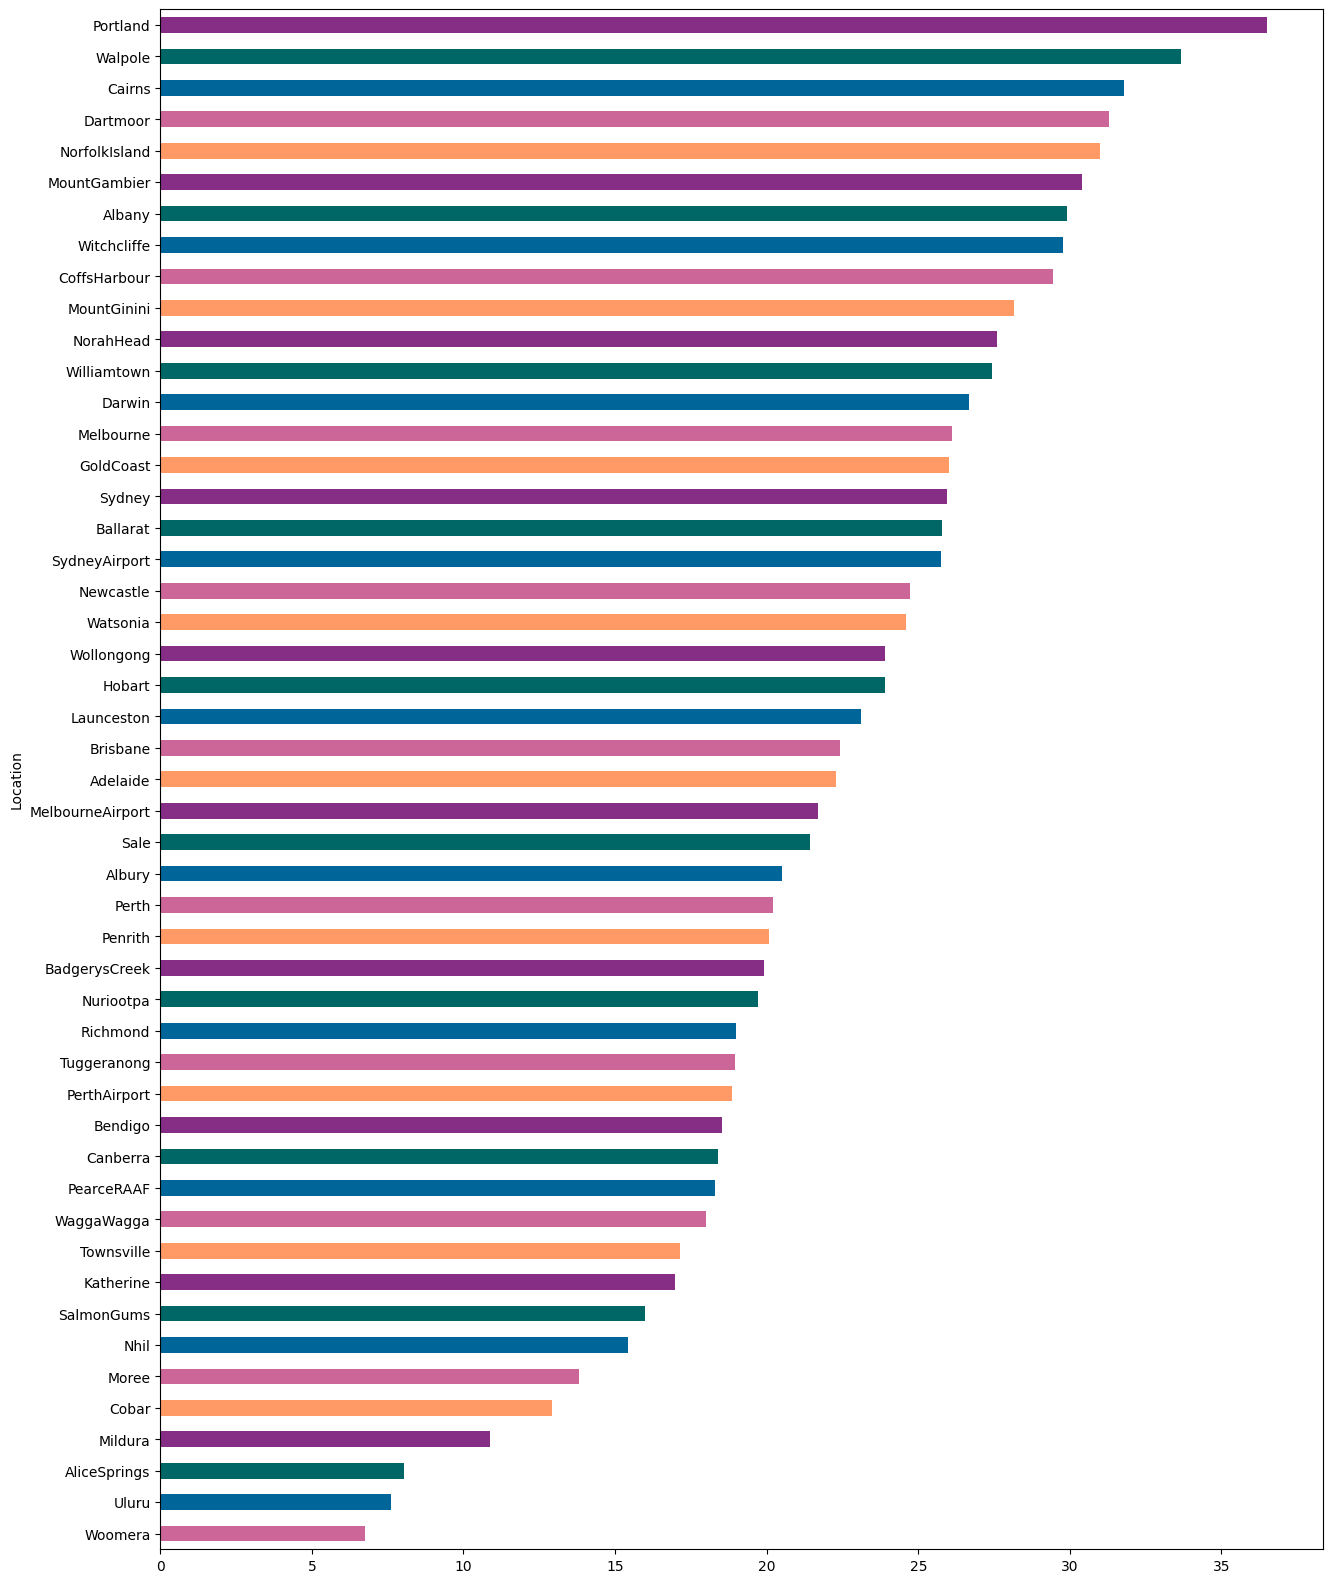

In [82]:
color=['#cc6699','#006699','#006666','#862d86','#ff9966'  ]
y.Yes.plot(kind="barh",figsize=(15,20),color=color);

#### location affects the raining as for Portland, it's raining 36% of days and for Woomers it's raining only 6% of the days

## Effects of humidity and pressure on raining tomorrow

In [83]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

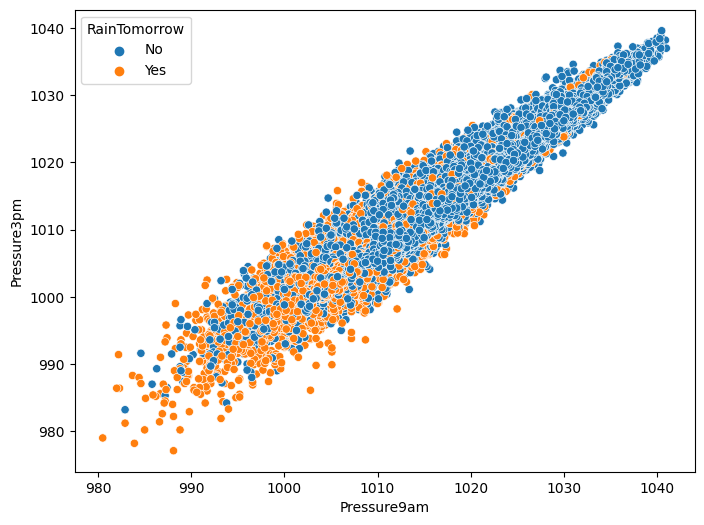

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Pressure9am',y='Pressure3pm',hue='RainTomorrow');

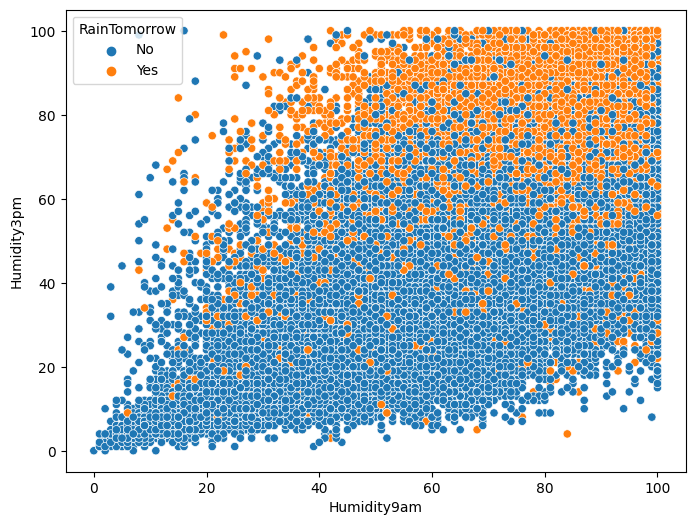

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow');

#### Low pressure increases the chance of raining tomorrow as well as high humidity ecpecially humidity at 3 pm

## Does temperature affect Raining? 

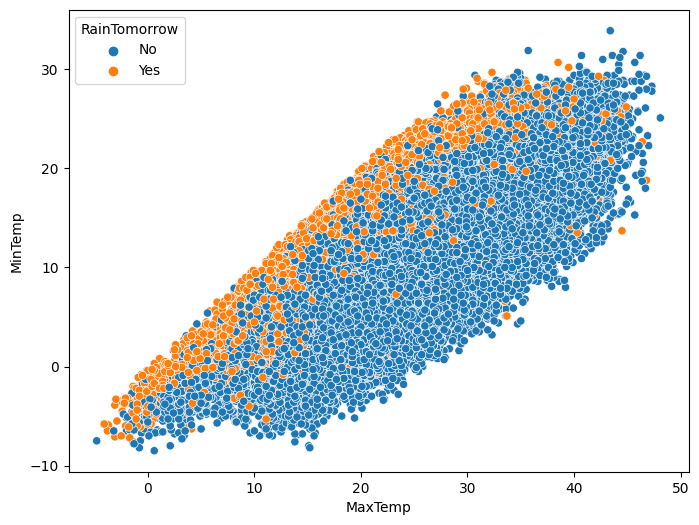

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MaxTemp', y='MinTemp', data=data, hue='RainTomorrow');

#### Chance of raining tomorrow increses when the maximum temperature of the day and minimum one are close to each other

## Months ~ Raining tomorrow

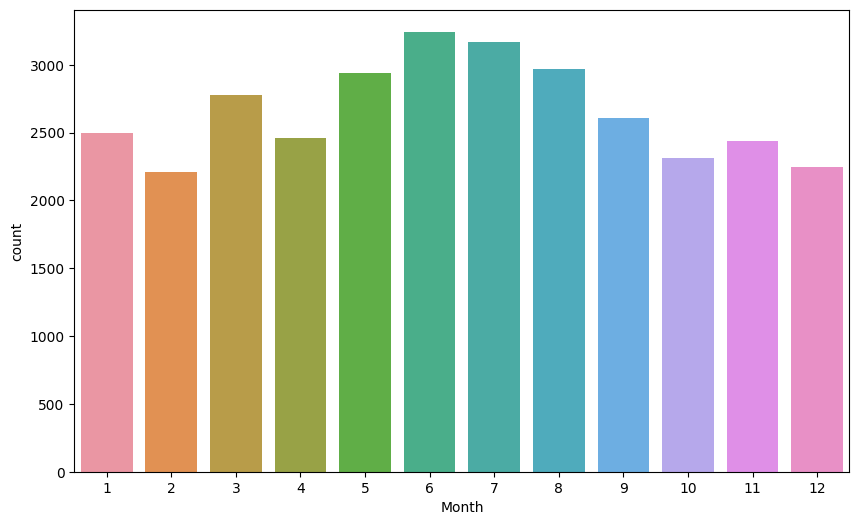

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=data[data['RainTomorrow']=='Yes'],x='Month');

#### It's a rainy season in June, July and August as these are the coldest months of the year in Australia

## Effect of rain fall and evaporation on raining tomorrow

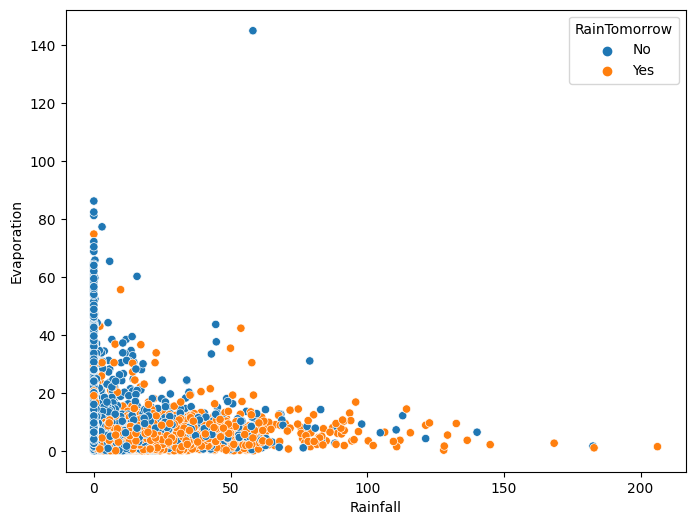

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Rainfall',y='Evaporation',hue='RainTomorrow');

#### High rainfall rates increse the chance of raining tomorrow 

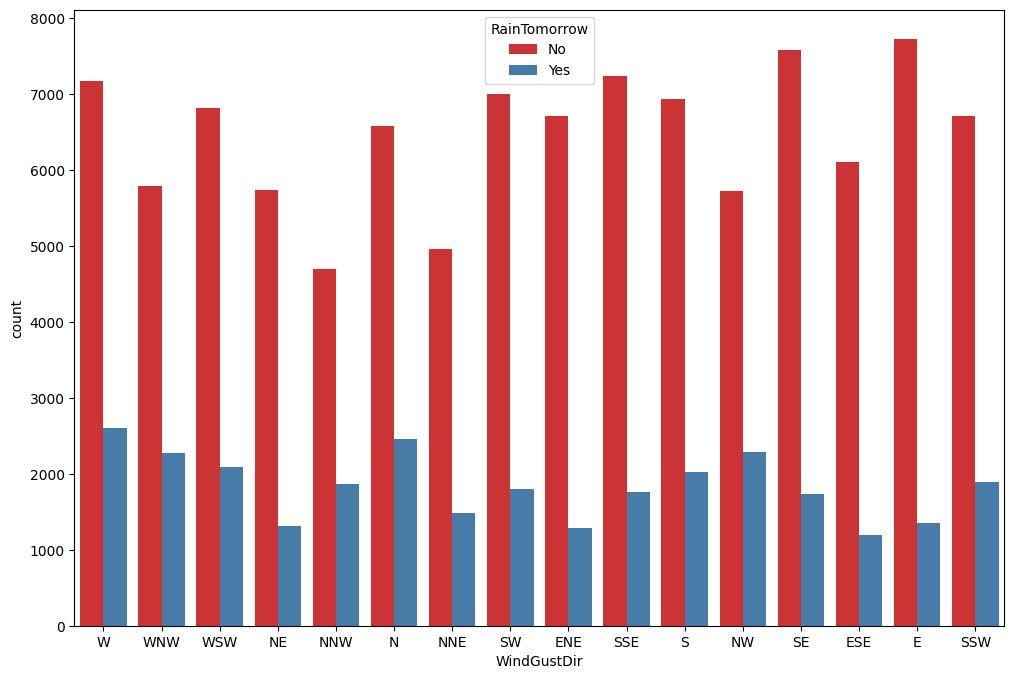

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='WindGustDir',hue='RainTomorrow',palette='Set1');

# Handling Missing Values

In [90]:
# percentage of missing data in each column
data.isnull().sum()/data.shape[0]*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
year              0.000000
Month             0.000000
day               0.000000
dtype: float64

In [91]:
# filling feature with large percentage of missing data using random choice 
lst=['Evaporation','Sunshine','Cloud9am','Cloud3pm']
for col in lst:
    fill_list = data[col].dropna()
    data[col] = data[col].fillna(pd.Series(
        np.random.choice(fill_list , size = len(data.index))))
#categorical features
s = (data.dtypes == "object")
object_cols = list(s[s].index)

In [92]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [93]:
#numeric features
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

In [94]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

In [95]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
Month            0
day              0
dtype: int64

# Handling Outliers

In [96]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

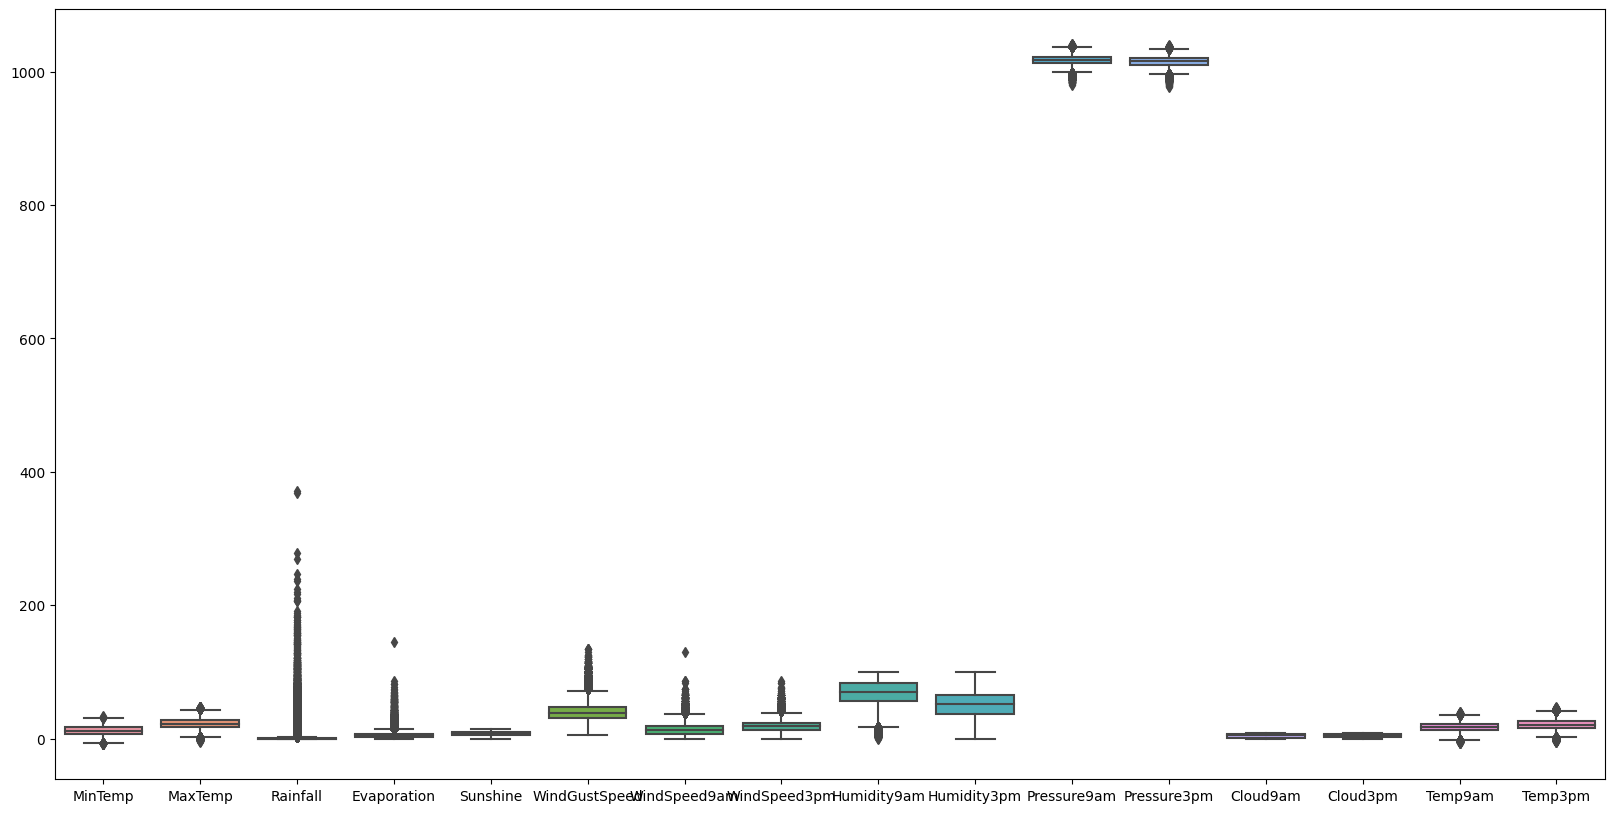

In [97]:
# show all the outliers as a graph using boxplot for each column in the dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='v')
plt.show()#

In [98]:
# MinTemp
x=data.loc[(data['MinTemp']>30)|(data['MinTemp']<-6)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MinTemp']<=30)&(data['MinTemp']>=-6)]

NO. of outliers = 76 
percentage of the outliers = 0.05%


In [99]:
# MaxTemp
x=data.loc[(data['MaxTemp']>45)|(data['MaxTemp']<1)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MaxTemp']<=45)&(data['MaxTemp']>=1)]

NO. of outliers = 215 
percentage of the outliers = 0.15%


In [100]:
# Rainfall
x=data.loc[data['Rainfall']>55]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Rainfall']<=55]

NO. of outliers = 647 
percentage of the outliers = 0.45%


In [101]:
# Evaporation
x=data.loc[(data['Evaporation']>30)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Evaporation']<=30)]

NO. of outliers = 430 
percentage of the outliers = 0.3%


In [102]:
# WindGustSpeed
x=data.loc[data['WindGustSpeed']>=80]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindGustSpeed']<80]

NO. of outliers = 1634 
percentage of the outliers = 1.13%


In [103]:
# WindSpeed9am
x=data.loc[data['WindSpeed9am']>40]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed9am']<=40]

NO. of outliers = 970 
percentage of the outliers = 0.68%


In [104]:
# WindSpeed3pm
x=data.loc[data['WindSpeed3pm']>45]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed3pm']<=45]

NO. of outliers = 447 
percentage of the outliers = 0.32%


In [105]:
# Humidity9am
x=data.loc[data['Humidity9am']<=19]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Humidity9am']>19]

NO. of outliers = 1705 
percentage of the outliers = 1.21%


In [106]:
# Pressure9am
x=data.loc[(data['Pressure9am']>1035)  |  (data['Pressure9am'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure9am']<=1035)  &  (data['Pressure9am'] >=1000)]

NO. of outliers = 1661 
percentage of the outliers = 1.19%


In [107]:
# Pressure3pm
x=data.loc[(data['Pressure3pm']>1032)  |  (data['Pressure3pm'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure3pm']<=1032)  &  (data['Pressure3pm'] >=1000)]

NO. of outliers = 1146 
percentage of the outliers = 0.83%


In [108]:
# Temp9am
x=data.loc[(data['Temp9am']>=35) | (data['Temp9am']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp9am']<35) & (data['Temp9am']>0)]

NO. of outliers = 334 
percentage of the outliers = 0.24%


In [109]:
# Temp3pm
x=data.loc[(data['Temp3pm']>40) | (data['Temp3pm']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp3pm']<=40) & (data['Temp3pm']>0)]

NO. of outliers = 363 
percentage of the outliers = 0.27%


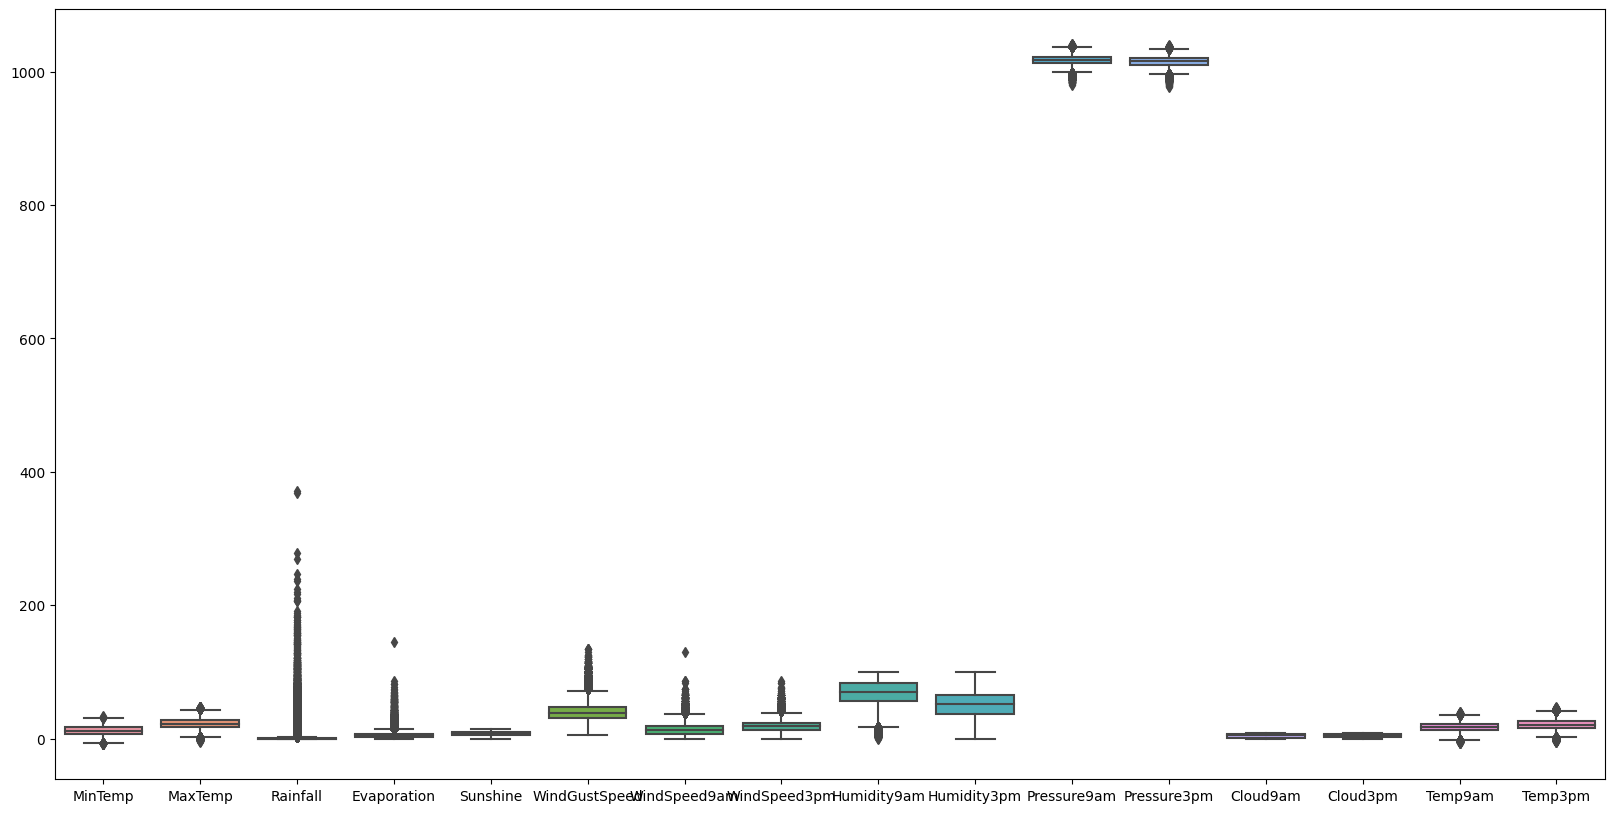

In [110]:
# show all the outliers as a graph using boxplot for each column in the dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='v')
plt.show()#

In [111]:
data.shape

(135832, 25)

In [112]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

# Encoding

In [113]:
#Encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [114]:
X = data.drop(['RainTomorrow','day'],axis=1).values
y = data['RainTomorrow'].values

# Modeling

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [116]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from tensorflow.keras.optimizers import Adam
from keras import regularizers
model = Sequential()

model.add(Dense(units=24,activation='tanh',))

#model.add(Dropout(0.2))

model.add(Dense(units=18,activation='tanh',kernel_regularizer=regularizers.l2(0.0001)))

#model.add(Dropout(0.2))

model.add(Dense(units=23,activation='tanh',kernel_regularizer=regularizers.l2(0.003)))

model.add(Dropout(0.5))

model.add(Dense(units=12,activation='tanh'))

model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt)


In [118]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',min_delta=0.001, verbose=1, patience=5,restore_best_weights=True)

In [119]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],
          epochs = 150,
          batch_size = 32
)

Epoch 1/150
3184/3184 [==============================] - 13s 4ms/step - loss: 0.4096 - val_loss: 0.3749
Epoch 2/150
3184/3184 [==============================] - 9s 3ms/step - loss: 0.3807 - val_loss: 0.3682
Epoch 3/150
3184/3184 [==============================] - 11s 4ms/step - loss: 0.3778 - val_loss: 0.3654
Epoch 4/150
3184/3184 [==============================] - 10s 3ms/step - loss: 0.3761 - val_loss: 0.3675
Epoch 5/150
3184/3184 [==============================] - 11s 3ms/step - loss: 0.3752 - val_loss: 0.3727
Epoch 6/150
3184/3184 [==============================] - 12s 4ms/step - loss: 0.3737 - val_loss: 0.3626
Epoch 7/150
3184/3184 [==============================] - 10s 3ms/step - loss: 0.3723 - val_loss: 0.3625
Epoch 8/150
3184/3184 [==============================] - 10s 3ms/step - loss: 0.3710 - val_loss: 0.3634
Epoch 9/150
3184/3184 [==============================] - 10s 3ms/step - loss: 0.3702 - val_loss: 0.3604
Epoch 10/150
3184/3184 [==============================] - 10s 3ms

<Axes: >

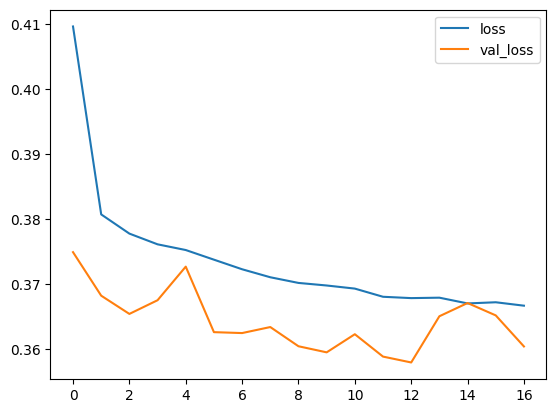

In [120]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [121]:
predictions = model.predict(X_test)
predictions=(predictions>0.5)

1062/1062 [==============================] - 2s 1ms/step


In [122]:
confusion_matrix(y_test,predictions)

array([[25418,  1292],
       [ 3862,  3386]])

In [123]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26710
           1       0.72      0.47      0.57      7248

    accuracy                           0.85     33958
   macro avg       0.80      0.71      0.74     33958
weighted avg       0.84      0.85      0.84     33958



In [124]:
mean_squared_error(y_test ,predictions)

0.15177572295188174

In [125]:
mean_absolute_error(y_test , predictions)

0.15177572295188174

In [126]:
r2_score(y_test , predictions)

0.09594584710441567